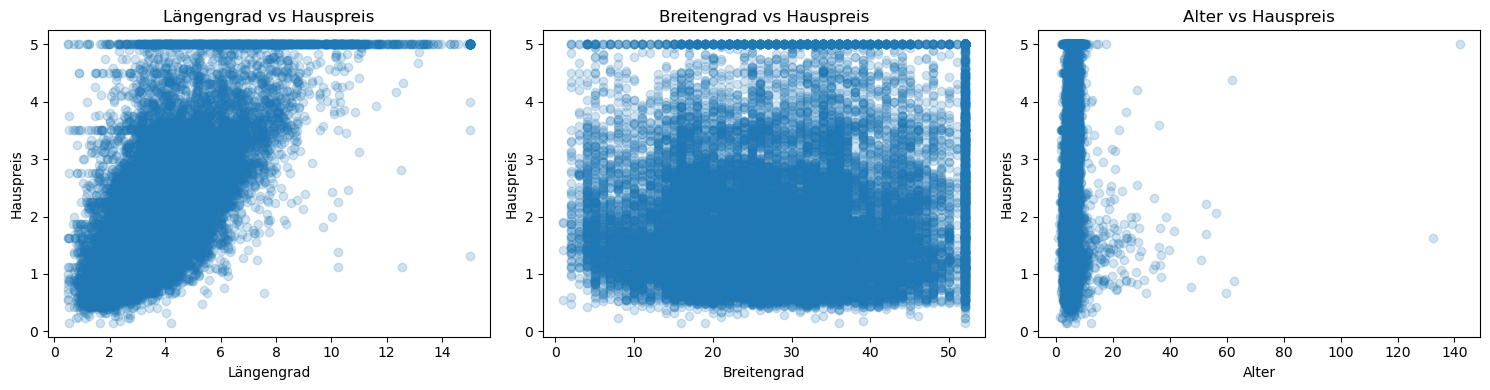

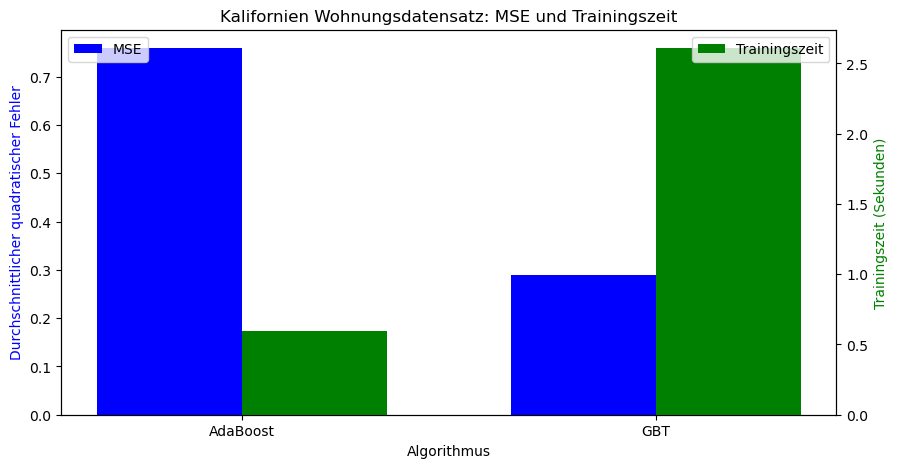

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import time
import os

# Daten laden und in DataFrame umwandeln
housing = fetch_california_housing()
X, y = housing.data, housing.target
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['Ziel'] = y  # Hauspreise als "Ziel"

# Deutsche Feature-Namen
feature_names_de = ['Längengrad', 'Breitengrad', 'Alter', 'Räume', 'Schlafzimmer', 'Bevölkerung', 'Haushalte', 'Einkommen']

# Visualisierung einiger Merkmale gegen den Zielwert
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.scatter(housing_df.iloc[:, i], housing_df['Ziel'], alpha=0.2)
    ax.set_xlabel(feature_names_de[i])
    ax.set_ylabel('Hauspreis')
    ax.set_title(f'{feature_names_de[i]} vs Hauspreis')

plt.tight_layout()

# Speichern der Plots
plt.savefig('../Images/housing_features.png')

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Anzahl der Wiederholungen
n_runs = 5

# Arrays für Ergebnisse
ada_times = []
ada_mse = []
gbt_times = []
gbt_mse = []

for _ in range(n_runs):
    # AdaBoost Regressor
    ada_reg = AdaBoostRegressor(random_state=42)
    start_time = time.time()
    ada_reg.fit(X_train, y_train)
    ada_times.append(time.time() - start_time)
    ada_mse.append(mean_squared_error(y_test, ada_reg.predict(X_test)))

    # Gradient Boosting Regressor
    gbt_reg = GradientBoostingRegressor(random_state=42)
    start_time = time.time()
    gbt_reg.fit(X_train, y_train)
    gbt_times.append(time.time() - start_time)
    gbt_mse.append(mean_squared_error(y_test, gbt_reg.predict(X_test)))

# Mittelwerte berechnen
ada_avg_time = np.mean(ada_times)
ada_avg_mse = np.mean(ada_mse)
gbt_avg_time = np.mean(gbt_times)
gbt_avg_mse = np.mean(gbt_mse)

# Ergebnisse visualisieren und speichern
labels = ['AdaBoost', 'GBT']
mse_scores = [ada_avg_mse, gbt_avg_mse]
training_times = [ada_avg_time, gbt_avg_time]

x = np.arange(len(labels))
width = 0.35

# Anpassung der Höhe des Plots
fig, ax1 = plt.subplots(figsize=(10, 4))  # Breite auf 10 Zoll und Höhe auf 5 Zoll einstellen

# Mittlerer quadratischer Fehler (MSE)
mse_bar = ax1.bar(x - width/2, mse_scores, width, label='MSE', color='b')
ax1.set_xlabel('Algorithmus')
ax1.set_ylabel('Durchschnittlicher quadratischer Fehler', color='b')
ax1.set_title('Kalifornien Wohnungsdatensatz: MSE und Trainingszeit')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')

# Trainingszeit
ax2 = ax1.twinx()
time_bar = ax2.bar(x + width/2, training_times, width, label='Trainingszeit', color='g')
ax2.set_ylabel('Trainingszeit (Sekunden)', color='g')
ax2.legend(loc='upper right')

plt.savefig('../Images/housing_performance.png')


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Daten laden
housing = fetch_california_housing()
X, y = housing.data, housing.target

# In DataFrame umwandeln
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['Hauspreis'] = y

# Auswahl der ersten 5 Zeilen für die Tabelle
table_df = housing_df.head()

# Konvertierung in LaTeX-Format mit begrenzten Dezimalstellen
latex_table = table_df.to_latex(index=False, float_format="%.2f")  # Eine Dezimalstelle


# Speichern der Tabelle in einer .tex-Datei
with open('../Tables/housing_data_table.tex', 'w') as file:
    file.write(latex_table)
